In [1]:
# usual imports
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
import pboc_utils as pboc

This script simulates the master equation for "diffusion" in the 1D space of allele frequencies. The interesting challenge compared to our simulation of simple diffusion is that the "diffusion constant" depends on our current position in allele space.

In [8]:
# define population size. N = 32 is true pop for Buri, N = 18 is eff pop size
N = 18
# initialize matrix as zeros
p = np.zeros((N+1, N+1))

In [9]:
# populate the matrix
for i in range(N+1):
    for j in range(N+1):
        # p[j, i] is prob of drawing j copies of allele, 
        # given i copies in previous generation
        # first compute the binomial coefficient
        bin_comb = np.math.factorial(N) \
                    / (np.math.factorial(j) * np.math.factorial(N-j))
        p[j, i] = bin_comb * (i/N)**j * (1-i/N)**(N-j)

In [10]:
# generate a matrix to store time history
n_gen = 19
allele_freq = np.zeros((N+1, n_gen))
# initialize
allele_freq[int(N/2), 0] = 1.0

<IPython.core.display.Javascript object>


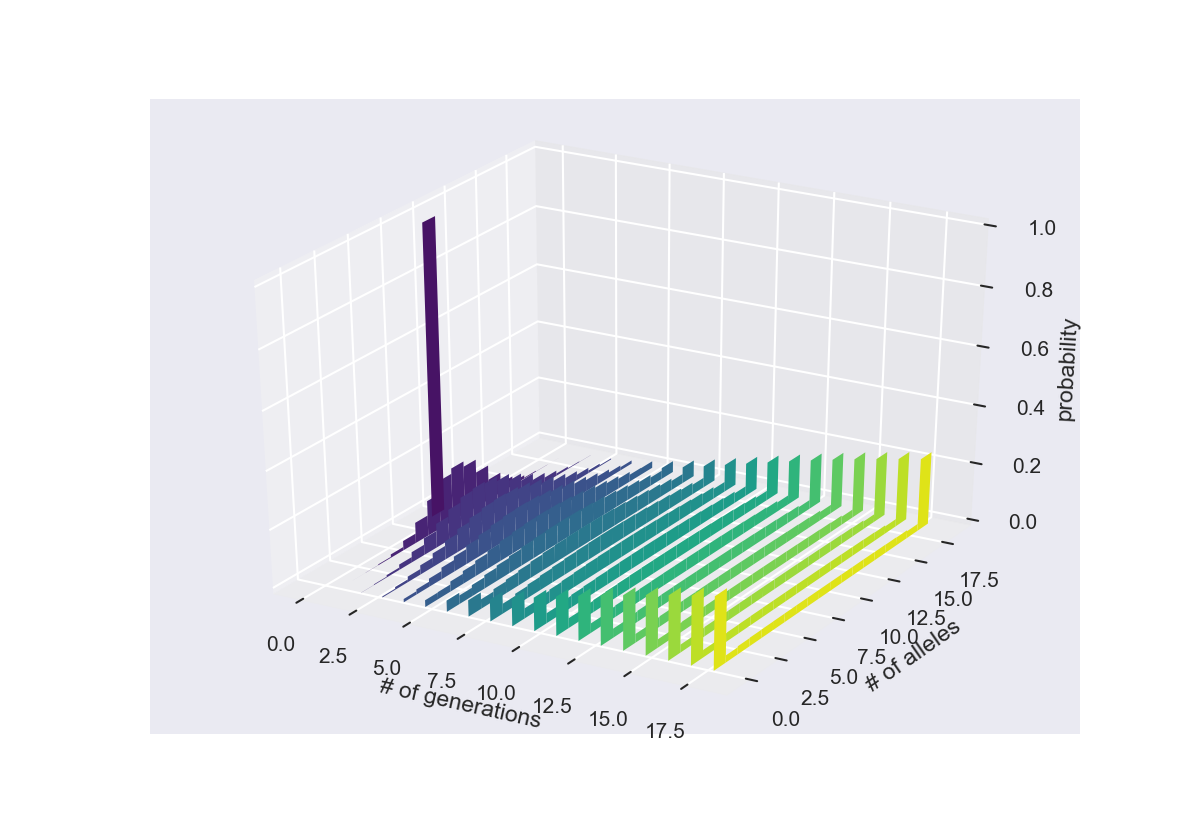

(<matplotlib.figure.Figure at 0x116dde6d8>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x116dcb080>)

In [11]:
# apply the matrix to each successive generation
for i in range(1, n_gen):
    allele_freq[:, i] = np.dot(p, allele_freq[:, i - 1])
    
pboc.bar3(allele_freq, xlabel='# of generations', ylabel=' # of alleles',
          zlabel='probability')

In [12]:
# computing heterozygosity to compare with Buri experiment
heterozyg = 1 - allele_freq[0, -1] - allele_freq[-1, -1]
heterozyg

0.49685286281955554